<a href="https://colab.research.google.com/github/Raquib603/Multiclass-Classifier/blob/main/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi-class Classification

#Load dataset by login into huggingface

In [ ]:
!huggingface-cli login

In [117]:
!pip install datasets
!pip install -U accelerate
!pip install -U transformers

In [118]:
import pandas as pd
from datasets import load_dataset

dd = load_dataset("AnkitAI/CategorizedTextReviews")


#******************
#assign value to df
df = pd.DataFrame(dd['train'])



In [119]:
df

,review,category
0,The product's innovative features have greatly...,Product Feedback
1,Customer service was unresponsive to my inquir...,Customer Service
2,"I was a victim of fraud, the seller requested ...",Fraud and Scam
3,The delivery was delayed due to unforeseen cir...,Operational Issues
4,"The product arrived with some defects, but the...",Product Feedback
...,...,...
6995,"Unfortunately, the product did not meet my exp...",Product Feedback
6996,I suspect fraudulent activity as I was charged...,Fraud and Scam
6997,I encountered a scam where the seller asked fo...,Fraud and Scam
6998,I faced several issues while placing my order ...,Operational Issues


In [121]:
df.shape
df.info

<bound method DataFrame.info of                                                  review            category
0     The product's innovative features have greatly...    Product Feedback
1     Customer service was unresponsive to my inquir...    Customer Service
2     I was a victim of fraud, the seller requested ...      Fraud and Scam
3     The delivery was delayed due to unforeseen cir...  Operational Issues
4     The product arrived with some defects, but the...    Product Feedback
...                                                 ...                 ...
6995  Unfortunately, the product did not meet my exp...    Product Feedback
6996  I suspect fraudulent activity as I was charged...      Fraud and Scam
6997  I encountered a scam where the seller asked fo...      Fraud and Scam
6998  I faced several issues while placing my order ...  Operational Issues
6999  I suspect fraudulent activity as I was charged...      Fraud and Scam

[7000 rows x 2 columns]>

#Checking maximum string length

<Axes: ylabel='Frequency'>

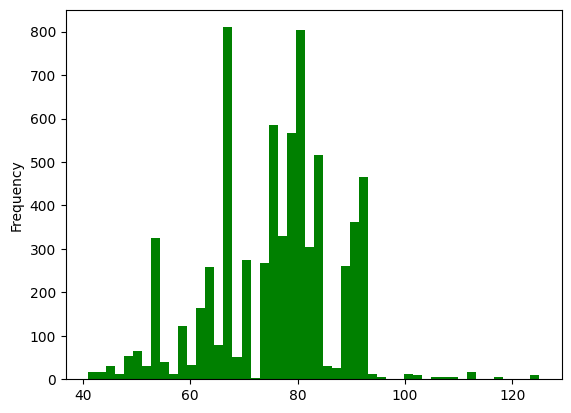

In [122]:
df['review'].str.len().plot.hist(bins=50, color = 'green')
#Here we see that, maximum number of character(not the token) in review is around 130

In [123]:
#see the categories of review in dataset
df['category'].value_counts()

,count
category,
Operational Issues,1800
Fraud and Scam,1755
Product Feedback,1738
Customer Service,1707


In [124]:
category_count = df['category'].value_counts()
categories = category_count.index
categories

Index(['Operational Issues', 'Fraud and Scam', 'Product Feedback',
       'Customer Service'],
      dtype='object', name='category')

In [125]:
df['category'].unique()

array(['Product Feedback', 'Customer Service', 'Fraud and Scam',
       'Operational Issues'], dtype=object)

#Bar plot for each of the new category

<Axes: xlabel='category'>

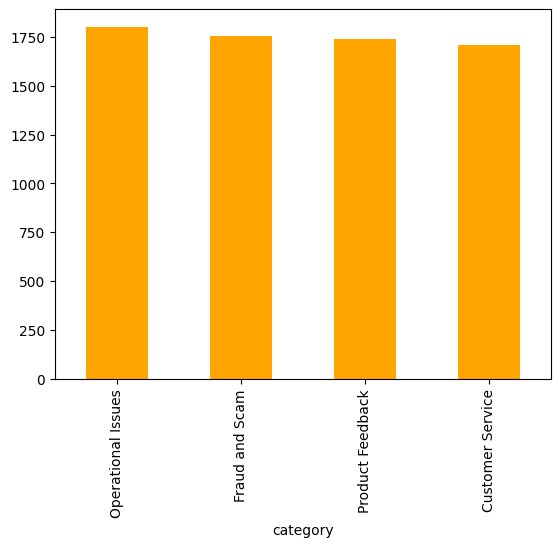

In [126]:
category_count = df['category'].value_counts()
category_count.plot(kind='bar', color = 'orange')

In [127]:
df.shape

(7000, 2)

#Train and Test Set
split dataset into two - train and test

#Label Encoder

In [128]:
from sklearn.model_selection import train_test_split

#split 80% data for train and 20% for test/validation
df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

In [129]:
#now see train and split
df_train.shape, df_test.shape

((5600, 2), (1400, 2))

In [130]:
#see by
df['review'][1500]

'Customer service was outstanding and resolved my issue swiftly.'

#Data Clean [Function]
Removing stop words(), special characters

In [131]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
!pip install nltk # install nltk if you haven't already
import nltk
nltk.download('punkt') # download the 'punkt' resource
nltk.download('stopwords') # download the 'stopwords' resource


def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove emails
    text = re.sub(r'\S*@\S*\s?', '', text)

    #     # Remove emojis
    #     emoji_pattern = re.compile("["
    #                                u"\U0001F600-\U0001F64F"  # emoticons
    #                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    #                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
    #                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    #                                u"\U00002702-\U000027B0"
    #                                u"\U000024C2-\U0001F251"
    #                                "]+", flags=re.UNICODE)
    #     text = emoji_pattern.sub(r'', text)

    #Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back into a single string
    text = ' '.join(tokens)

    return text


df['clean_review'] = df['review'].apply(lambda x: preprocess_text(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [132]:
df_train['category'].value_counts()

,count
category,
Operational Issues,1426
Customer Service,1402
Fraud and Scam,1395
Product Feedback,1377


#Converting our target column into categorical data



In [133]:
encoded_dict = {'Operational Issues' : 0, 'Customer Service' : 1,  'Fraud and Scam' : 2, 'Product Feedback' : 3}


df_train['category'] = df_train['category'].map(encoded_dict)
df_test['category'] = df_test['category'].map(encoded_dict)

In [134]:
from keras.utils import to_categorical

#set binary value for category
y_train = to_categorical(df_train['category'])
y_test = to_categorical(df_test['category'])

In [135]:
y_train

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

#Loading Model and Tokenizer from the transformers package

By fine tuning we can give new structures to models

In [136]:
from transformers import TFRobertaModel, RobertaTokenizer
import tensorflow as tf


# Load pre-trained RoBERTa model
roberta_model = TFRobertaModel.from_pretrained('roberta-base')

# Load pre-trained RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')




Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'roberta.embeddings.position_ids', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

See tokenizer work

In [137]:
text = ['you are good']

In [138]:
tokenizer (text = text,
           max_length =10,
           add_special_tokens = True,
           padding = True,
           truncation = True,
           return_tensors = 'tf',
           return_attention_mask = True,
           verbose = True)

{'input_ids': <tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[   0, 6968,   32,  205,    2]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[1, 1, 1, 1, 1]], dtype=int32)>}

In [139]:
max_len_train = max(len(text) for text in df_train['review'])
max_len_test= max(len(text) for text in df_test['review'])


**Convert** the input textual data into BERT’s input data format using a tokenizer.
Since we have loaded bert-base-cased, so tokenizer will also be Bert-base-cased.

In [140]:
#Tokenize the input


max_len = 128
x_train = tokenizer(
    text=df_train.review.tolist(), #from df_train dataset we took the reviews and convert into list

    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

x_test = tokenizer(
    text=df_test.review.tolist(),  #from df_test dataset we took the reviews and convert into list

    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

In [141]:
input_ids = x_train['input_ids']
attention_mask = x_train['attention_mask']

#will use these 2 as input

input_ids.shape, attention_mask.shape

(TensorShape([5600, 26]), TensorShape([5600, 26]))

#Model !

In [142]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Input, Dense, GlobalMaxPool1D, Dropout, Lambda

import torch

In [143]:
# Define input layers
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

input_ids.shape, input_mask.shape

((None, 128), (None, 128))

In [145]:
from tensorflow.keras.layers import Lambda
from transformers import TFRobertaModel

# Wrap the roBERT model inside a Lambda layer
def roberta_layer(inputs):
    roberta_model = TFRobertaModel.from_pretrained('roberta-base')
    return roberta_model(input_ids=inputs[0], attention_mask=inputs[1])[0]

# Define the input layers
input_ids = Input(shape=(512,), dtype=tf.int32, name='input_ids')
input_mask = Input(shape=(512,), dtype=tf.int32, name='input_mask')

# Apply the roBERT model wrapped in a Lambda layer
# Specify the output shape for the Lambda layer
embeddings = Lambda(roberta_layer, output_shape=(512, 768))([input_ids, input_mask])

# Add additional layers after roBERT embeddings
out = GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = Dropout(0.1)(out)
out = Dense(32, activation='relu')(out)

# Output layer for 5 categories
y = Dense(5, activation='sigmoid')(out)

# Create the Keras model
model = Model(inputs=[input_ids, input_mask], outputs=y)

# Optionally make roBERT layers trainable
model.layers[2].trainable = True

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_ids (InputLayer)    │ (None, 512)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_mask (InputLayer)   │ (None, 512)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_9 (Lambda)         │ (None, 512, 768)       │              0 │ input_ids[0][0],       │
│                           │                        │                │ input_mask[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_1    │ (None, 768)            │              0 │ lambda_9[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │         98,432 │ global_max_pooling1d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128)            │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 32)             │          4,128 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 5)              │            165 │ dense_4[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 102,725 (401.27 KB)

 Trainable params: 102,725 (401.27 KB)

 Non-trainable params: 0 (0.00 B)